In [1]:
import gzip
import pickle 
import matplotlib
matplotlib.rc('font', size=15)
import torch 
import pandas as pd
import numpy as np
import plotly.express as px
import sys
sys.path.append("/afs/cern.ch/work/m/mgarciam/private/mlpf/")
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt

/afs/cern.ch/work/m/mgarciam/private/miniconda/miniconda3/envs/graphgps0/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [97]:
from src.utils.inference.pandas_helpers import open_mlpf_dataframe
list_all_df_hdb = []
path_hgcal = "/eos/user/m/mgarciam/datasets_mlpf/models_trained_CLD/eval_comp_Z_uds/showers_df_evaluation/v7newecor_Hss_batch10_0_None.pt"
sd_hgb, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
path_hgcal = "/eos/user/m/mgarciam/datasets_mlpf/models_trained_CLD/eval_comp_Z_uds/showers_df_evaluation/v7newecor_Hss_batch10_0_None_pandora.pt"
sd_hgb2, matched_hgb = open_mlpf_dataframe(path_hgcal, False)


In [99]:
sd_hgb2[sd_hgb2.number_batch==47]

,true_showers_E,reco_showers_E,pred_showers_E,e_pred_and_truth,pandora_calibrated_E,pandora_calibrated_pfo,pandora_calibrated_pos,pandora_ref_pt,pid,pandora_pid,...,number_batch,is_track_in_cluster,is_track_correct,is_track_in_MC,distance_to_cluster_MC,vertex,ECAL_hits,HCAL_hits,true_pos,pid_4_class_true
0,9.221690,9.609292,8.083990,7.853788,9.181150,9.181150,"[4.372735977172852, 6.36025857925415, 4.969924...","[20.815427780151367, 28.696887969970703, 49.55...",-211.0,-211.0,...,47.0,1.0,1.0,1,0.146577,"[0.11716946022140143, -1.489842298614392, 25.9...",236.0,18.0,"[4.39409303047157, 6.388202641049316, 4.990281...",1.0
1,7.169262,10.075873,8.292753,8.080053,7.171598,7.171598,"[4.093981742858887, 4.349353313446045, 3.96668...","[25.846677780151367, 25.752294540405273, 50.87...",211.0,211.0,...,47.0,1.0,1.0,1,0.159614,"[0.11716946022140143, -1.489842298614392, 25.9...",203.0,46.0,"[4.091328467759642, 4.3484935554241035, 3.9661...",1.0
2,1.023145,0.771229,0.673756,0.673756,1.026377,1.026377,"[0.29624801874160767, -0.20300470292568207, 0....","[40.35225296020508, -31.449108123779297, 158.9...",211.0,211.0,...,47.0,1.0,1.0,1,0.109257,"[0.11716946022140143, -1.489842298614392, 25.9...",28.0,1.0,"[0.2995431823842092, -0.20115627831915572, 0.9...",1.0
3,2.481838,2.095733,2.017956,2.017956,2.481415,2.481415,"[-0.8126145005226135, -2.1045334339141846, -1....","[-12.454288482666016, -33.52425003051758, 10.3...",211.0,211.0,...,47.0,1.0,1.0,1,0.159954,"[0.11716946022140143, -1.489842298614392, 25.9...",76.0,0.0,"[-0.8139308321095816, -2.1057185051868252, -1....",1.0
4,10.233662,9.728615,9.494581,9.494581,9.663313,9.663313,"[5.040493965148926, 6.257079124450684, 5.36861...","[1420.5333251953125, 1762.8123779296875, 1512....",22.0,22.0,...,47.0,0.0,0.0,0,0.000000,"[0.11749540485769502, -1.4894434712041704, 25....",285.0,1.0,"[5.364188876048044, 6.668019369520089, 5.61166...",3.0
5,4.839673,3.788598,3.650580,3.650580,4.808473,4.808473,"[2.218707799911499, 3.427316904067993, 2.53629...","[19.885774612426758, 29.2336483001709, 48.6884...",-211.0,-211.0,...,47.0,1.0,1.0,1,0.100152,"[0.11716946022140143, -1.489842298614392, 25.9...",79.0,13.0,"[2.2309840121475997, 3.450290706569063, 2.5536...",1.0
6,0.668918,0.357467,0.357467,0.357467,0.666001,0.666001,"[0.2173607498407364, 0.36372801661491394, -0.4...","[19.40180778503418, 29.51310157775879, -16.703...",211.0,211.0,...,47.0,1.0,1.0,1,0.037583,"[0.11716946022140143, -1.489842298614392, 25.9...",13.0,0.0,"[0.2164634598229446, 0.3659748042324474, -0.49...",1.0
7,0.446629,0.225209,0.220018,0.220018,0.446137,0.446137,"[-0.14681577682495117, 0.21225406229496002, 0....","[-22.181119918823242, 27.908470153808594, 74.1...",-211.0,-211.0,...,47.0,1.0,1.0,1,0.043523,"[0.11716946022140143, -1.489842298614392, 25.9...",15.0,0.0,"[-0.14759922431697564, 0.2115931627529663, 0.3...",1.0
8,5.911013,4.741167,2.082858,1.975659,4.707885,4.707885,"[-2.1504063606262207, -3.3238494396209717, -2....","[-18.495450973510742, -30.036380767822266, 4.0...",211.0,211.0,...,47.0,1.0,0.0,2,0.166619,"[0.11716946022140143, -1.489842298614392, 25.9...",65.0,12.0,"[-2.725197485687799, -4.121838695131902, -3.24...",1.0
9,3.444194,3.659214,0.887889,0.887889,3.375849,3.375849,"[-1.6965855360031128, -2.1370646953582764, -1....","[-21.13619041442871, -28.511764526367188, 1.05...",-321.0,-211.0,...,47.0,1.0,0.0,0,0.000000,"[0.11716946022140143, -1.489842298614392, 25.9...",30.0,0.0,"[-1.7125463684971407, -2.162970573748139, -2.0...",1.0


In [100]:
sd_hgb[sd_hgb.number_batch==29]

,true_showers_E,reco_showers_E,pred_showers_E,e_pred_and_truth,pid,calibration_factor,calibrated_E,step,number_batch,is_track_in_cluster,...,distance_to_cluster_MC,vertex,ECAL_hits,HCAL_hits,pred_pos_matched,pred_pid_matched,pred_ref_pt_matched,matched_extra_features,true_pos,pid_4_class_true
0,2.320539,2.894770,2.900308,2.892473,-211.0,2.317728,2.317728,29.0,29.0,1.0,...,0.109678,"[-0.35615804828402825, -0.5942483206182788, 15...",121.0,2.0,"[0.663391649723053, 0.4064623713493347, 0.6282...",1.0,"[0.0058051347732543945, 0.025435805320739746, ...","[124.0, 0.9806010723114014, -0.563654422760009...","[1.538497837530438, 0.9389890268415094, 1.4549...",1.0
1,4.049222,4.147905,3.267850,3.243669,211.0,4.046227,4.046227,29.0,29.0,1.0,...,0.155976,"[-0.35615804828402825, -0.5942483206182788, 15...",77.0,1.0,"[-0.6331841349601746, -0.5086469650268555, -0....",1.0,"[-0.02907484769821167, -0.007609814405441284, ...","[79.0, 0.8963682651519775, -2.1559066772460938...","[-2.560329993983039, -2.0588950332279072, -2.3...",1.0
2,7.355552,7.778042,6.188964,6.003334,22.0,5.692188,5.692188,29.0,29.0,0.0,...,0.000000,"[-0.3552300895961747, -0.5937027514069666, 15....",188.0,0.0,"[0.7367921471595764, 0.4249127507209778, 0.525...",3.0,"[1908.1346435546875, 1100.4334716796875, 1362....","[188.0, 0.4176590144634247, 0.0, 0.0, -1.67255...","[5.43406113958674, 3.1349379179587182, 3.84021...",3.0
3,22.404598,22.752850,20.755573,20.388777,22.0,19.522102,19.522102,29.0,29.0,0.0,...,0.000000,"[-0.3552300895961747, -0.5937027514069666, 15....",502.0,0.0,"[0.7290119528770447, 0.43190184235572815, 0.53...",3.0,"[1900.4364013671875, 1125.91015625, 1384.34753...","[502.0, 0.29818037152290344, 0.0, 0.0, -2.2512...","[16.397107945810706, 9.700130987419778, 11.790...",3.0
4,2.834111,2.638942,2.707672,2.638941,211.0,2.837269,2.837269,29.0,29.0,1.0,...,0.115197,"[-0.35615804828402825, -0.5942483206182788, 15...",121.0,6.0,"[0.7963223457336426, 0.5008801817893982, 0.339...",1.0,"[0.04333007335662842, 0.0006782561540603638, 0...","[128.0, 0.9769992232322693, -5.612504959106445...","[2.2532220584976126, 1.4187789604949912, 0.960...",1.0
5,0.967321,0.256349,0.336337,0.248513,-211.0,0.282643,0.282643,29.0,29.0,0.0,...,0.159033,"[-0.35615804828402825, -0.5942483206182788, 15...",14.0,2.0,"[0.09275135397911072, 0.7448996305465698, 0.66...",2.0,"[196.06832885742188, 1574.6533203125, 1396.658...","[16.0, 0.977371871471405, 0.0, 0.0, 0.97106140...","[0.6899132373300036, 0.5569354597063552, 0.360...",1.0
6,0.488987,0.357413,0.357413,0.357413,211.0,0.462986,0.462986,29.0,29.0,1.0,...,0.110696,"[-0.35615804828402825, -0.5942483206182788, 15...",36.0,0.0,"[0.07212740182876587, 0.45257923007011414, 0.8...",0.0,"[-0.007079198956489563, -0.023046448826789856,...","[37.0, 0.9772891402244568, 0.6362780928611755,...","[0.03778918133733669, 0.21154402121355714, 0.4...",1.0
7,2.909416,2.599246,2.599246,2.599246,-211.0,2.865659,2.865659,29.0,29.0,1.0,...,0.120641,"[-0.35615804828402825, -0.5942483206182788, 15...",94.0,5.0,"[-0.6561073660850525, -0.43494606018066406, -0...",1.0,"[-0.017406076192855835, -0.04164773225784302, ...","[101.0, 0.9815763235092163, -3.995305061340332...","[-1.90636950696858, -1.2653157589693365, -1.79...",1.0
8,3.239096,3.208597,3.079782,3.079782,22.0,2.993279,2.993279,29.0,29.0,0.0,...,0.000000,"[-0.3561580962930391, -0.5942483512535012, 15....",129.0,0.0,"[-0.759835958480835, -0.41407862305641174, -0....",3.0,"[-1932.648681640625, -1053.212158203125, -1274...","[129.0, 0.8449030518531799, 0.0, 0.0, -1.92882...","[-2.453936091825776, -1.3369748047480037, -1.6...",3.0
9,0.845909,0.801675,0.801675,0.801675,22.0,0.726029,0.726029,29.0,29.0,0.0,...,0.000000,"[-0.3561580962930391, -0.5942483512535012, 15....",38.0,0.0,"[-0.6444517374038696, -0.6828674674034119, -0....",3.0,"[-1545.826416015625, -1637.9730224609375, -825...","[38.0, 0.9941151142120361, 0.0, 0.0, -1.044909...","[-0.5442735371979932, -0.5762247577489609, -0....",3.0


In [95]:
from src.utils.inference.event_metrics import calculate_event_mass_resolution
dic_model = calculate_event_mass_resolution(sd_hgb, False, perfect_pid=False, mass_zero=False, ML_pid=True, fake=False)
dic_pandora = calculate_event_mass_resolution(sd_hgb2, True, perfect_pid=False, mass_zero=False, ML_pid=True, fake=False)


/afs/cern.ch/work/m/mgarciam/private/mlpf/src/utils/inference/event_metrics.py:166: RuntimeWarning: invalid value encountered in divide
  pred_vect /= np.linalg.norm(pred_vect, axis=1).reshape(-1, 1)
/afs/cern.ch/work/m/mgarciam/private/mlpf/src/utils/inference/event_metrics.py:185: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  true_E_jet = scatter_sum(torch.tensor(true_e), batch_idx)
/afs/cern.ch/work/m/mgarciam/private/mlpf/src/utils/inference/event_metrics.py:186: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  true_E_jet_reco = scatter_sum(torch.tensor(reco_true_e), batch_idx)
/afs/cern.ch/work/m/mgarciam/private/mlpf/src/utils/inference/event_metrics.py:187: UserWarning: To copy const

In [19]:
dic_model["mass_over_true_p"][14],dic_pandora["mass_over_true_p"][14]

(tensor(0.9084, dtype=torch.float64), tensor(0.9760, dtype=torch.float64))

In [ ]:
[ 72, 103, 139, 156, 261, 312, 328, 353, 372, 390]

In [96]:
condition1 = np.abs(dic_model["mass_over_true_p"]-dic_pandora["mass_over_true_p"])>0.05
condition2 = dic_model["mass_over_true_p"]>0.9
mask = torch.where(condition1*condition2)[0]
print(mask[0:20])
print(dic_model["mass_over_true_p"][mask][0:20])
print(dic_pandora["mass_over_true_p"][mask][0:20])

tensor([ 1, 10, 11, 18, 23, 25, 27, 29, 31, 33, 34, 35, 36, 38, 42, 43, 44, 47,
        49, 50])
tensor([1.0018, 1.0220, 0.9758, 0.9725, 1.0248, 0.9760, 1.0009, 0.9246, 0.9850,
        0.9044, 0.9920, 0.9686, 0.9630, 0.9819, 0.9639, 0.9945, 0.9699, 0.9507,
        0.9734, 0.9854], dtype=torch.float64)
tensor([1.2093, 1.0745, 1.0809, 1.0531, 1.4113, 1.0266, 1.4021, 0.9858, 0.8861,
        1.0006, 1.0564, 1.0602, 1.0320, 1.0455, 1.0269, 1.1005, 1.0497, 1.0246,
        1.0528, 1.0421], dtype=torch.float64)


(0.0, 2.0)

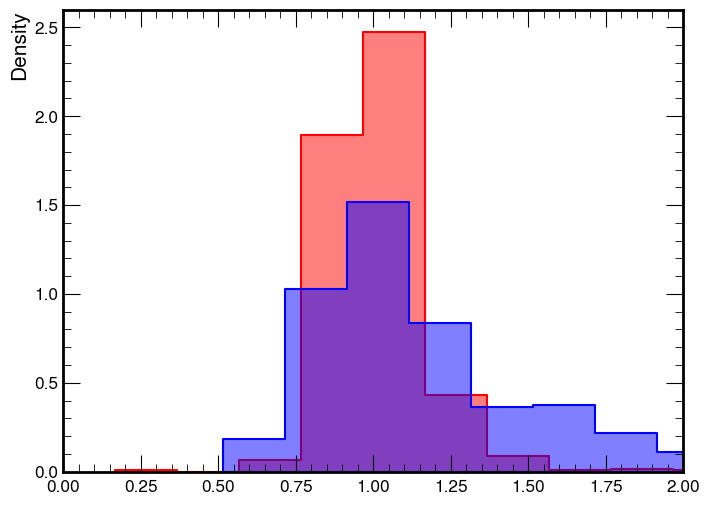

In [4]:
import seaborn as sns
photons_ML = sd_hgb[(sd_hgb.pid==22)*(~np.isnan(sd_hgb.pred_showers_E))].calibration_factor
photons_ML_true = sd_hgb[(sd_hgb.pid==22)*(~np.isnan(sd_hgb.pred_showers_E))].true_showers_E

photons_pan = sd_pandora[(sd_pandora.pid==22)*(~np.isnan(sd_pandora.pred_showers_E))].pandora_calibrated_pfo
photons_pan_true = sd_pandora[(sd_pandora.pid==22)*(~np.isnan(sd_pandora.pred_showers_E))].true_showers_E
plt.figure(figsize=(8,6))
sns.histplot(photons_ML/photons_ML_true, color='red', label='Fakes',  binwidth=0.2, stat='density', alpha=0.5, element='step', linewidth=1.5)
sns.histplot(photons_pan/photons_pan_true, color='blue', label='True showers',  binwidth=0.2, stat='density', alpha=0.5, element='step', linewidth=1.5)
plt.xlim([0,2])

In [7]:
sd_hgb[sd_hgb.is_track_in_cluster==0]

,true_showers_E,reco_showers_E,pred_showers_E,e_pred_and_truth,pid,calibration_factor,calibrated_E,step,number_batch,is_track_in_cluster,...,distance_to_cluster_MC,vertex,ECAL_hits,HCAL_hits,pred_pos_matched,pred_pid_matched,pred_ref_pt_matched,matched_extra_features,true_pos,pid_4_class_true
4,20.304108,17.335344,17.335344,17.335342,-2212.0,22.986029,22.986029,0.0,0.0,0.0,...,0.0,"[-0.27163881063846795, -0.7838215221038044, -1...",646.0,30.0,"[-0.8974091410636902, 0.39064207673072815, -0....",2.0,"[-2067.7265625, 900.0811767578125, -472.514434...","[676.0, 0.6501588821411133, 0.0, 0.0, 2.330639...","[-14.164046698523325, 7.065217696618396, -3.18...",1
7,30.528578,25.502344,25.502346,25.502346,22.0,30.676891,30.676891,0.0,0.0,0.0,...,0.0,"[-0.26929181840710026, -0.7849706382463671, -1...",680.0,5.0,"[0.8795711994171143, -0.4293428957462311, 0.20...",3.0,"[2011.515625, -981.8760986328125, 468.78750610...","[685.0, 0.810463011264801, 0.0, 0.0, -2.652334...","[21.276221096399812, -10.38707723144543, 5.161...",3
11,0.473224,0.545962,0.545962,0.545962,22.0,0.580681,0.580681,0.0,0.0,0.0,...,0.0,"[-0.27163881844742477, -0.7838215298502341, -1...",25.0,0.0,"[-0.9556956887245178, -0.09855411946773529, -0...",3.0,"[-2180.01220703125, -224.80921936035156, -632....","[25.0, 0.9802363514900208, 0.0, 0.0, -1.689094...","[-0.32816930055168797, -0.03557239675715785, -...",3
15,2.132610,1.659328,1.659329,1.659329,22.0,1.991665,1.991665,0.0,0.0,0.0,...,0.0,"[-0.27084611016789356, -0.7843096075932533, -1...",83.0,0.0,"[0.8470668792724609, -0.4847404956817627, 0.21...",3.0,"[1921.1954345703125, -1099.4188232421875, 494....","[83.0, 0.9149379730224609, 0.0, 0.0, -1.885277...","[1.481896732225658, -0.8490511254165976, 0.394...",3
16,4.286001,3.640319,3.640319,3.640319,22.0,4.363916,4.363916,0.0,0.0,0.0,...,0.0,"[-0.27084611016789356, -0.7843096075932533, -1...",160.0,0.0,"[0.8279139995574951, -0.5277743935585022, 0.18...",3.0,"[1876.3314208984375, -1196.1141357421875, 430....","[160.0, 0.9567064642906189, 0.0, 0.0, -2.33801...","[2.9881117419504473, -1.9032447983866838, 0.71...",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,0.716654,0.884047,0.884047,0.884047,22.0,0.727349,0.727349,4.0,98.0,0.0,...,0.0,"[-397.13490144298055, -563.0855504653375, 1016...",45.0,0.0,"[-0.28680774569511414, -0.5085728168487549, 0....",3.0,"[-830.5619506835938, -1472.767822265625, 2351....","[45.0, 0.7699167728424072, 0.0, 0.0, -1.763652...","[-0.2094233515143629, -0.4442775968350649, 0.6...",3
4,6.549798,6.789770,6.789772,6.789772,130.0,7.207943,7.207943,4.0,99.0,0.0,...,0.0,"[-0.2637561307828959, 0.19375502989403925, 27....",3.0,70.0,"[0.18603761494159698, 0.2836291491985321, 0.94...",2.0,"[561.4795532226562, 856.0202026367188, 2839.16...","[73.0, 0.41274598240852356, 0.0, 0.0, 1.946155...","[1.2409998288005615, 1.8980798426382113, 6.290...",2
5,2.914570,1.669400,1.669401,1.669401,130.0,1.244597,1.244597,4.0,99.0,0.0,...,0.0,"[-0.26375643914412206, 0.19375448962647426, 27...",41.0,2.0,"[0.3632209599018097, 0.1562211811542511, 0.918...",2.0,"[923.671142578125, 397.2705993652344, 2335.778...","[43.0, 0.8797145485877991, 0.0, 0.0, 1.1799217...","[0.9924131074313927, 0.46636088777588575, 2.50...",2
6,2.983538,3.373082,3.373082,3.373082,130.0,2.654328,2.654328,4.0,99.0,0.0,...,0.0,"[-0.26375657954999004, 0.19375506039092683, 27...",33.0,11.0,"[-0.03469472751021385, 0.3963760733604431, 0.9...",2.0,"[-94.0980453491211, 1075.039794921875, 2488.23...","[44.0, 0.9356318116188049, 0.0, 0.0, 1.8098813...","[-0.16093137117177092, 1.279341434354172, 2.93...",2


(0.0, 25.0)

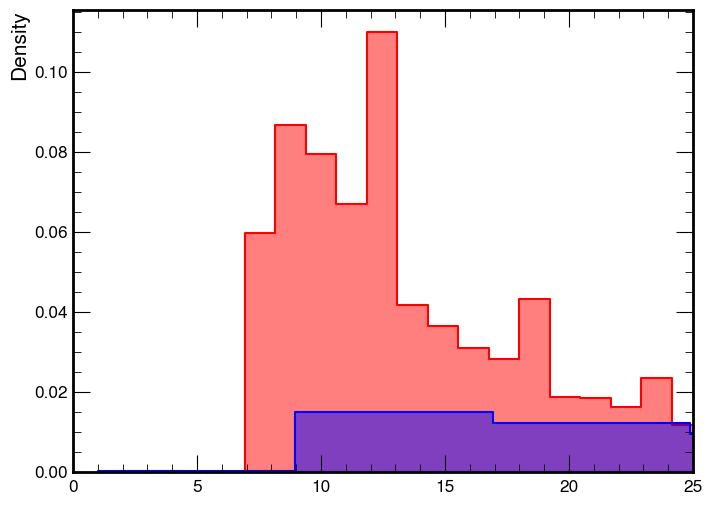

In [47]:
num_hits = sd_hgb.ECAL_hits+sd_hgb.HCAL_hits
fakes = num_hits[np.isnan(sd_hgb.true_showers_E)]
not_fakes = num_hits[(~np.isnan(sd_hgb.true_showers_E))*(~np.isnan(sd_hgb.pred_showers_E))]
plt.figure(figsize=(8,6))

# Plot histograms
sns.histplot(fakes[fakes>0], color='red', label='Fakes',  bins=200, stat='density', alpha=0.5, element='step', linewidth=1.5)
sns.histplot(not_fakes[not_fakes>0], color='blue', label='True showers',  bins=200, stat='density', alpha=0.5, element='step', linewidth=1.5)

plt.xlim([0,25])

In [41]:
sd_hgb[~np.isnan(sd_hgb.true_showers_E)]

,true_showers_E,reco_showers_E,pred_showers_E,e_pred_and_truth,pid,calibration_factor,calibrated_E,step,number_batch,is_track_in_cluster,...,distance_to_cluster_MC,vertex,ECAL_hits,HCAL_hits,pred_pos_matched,pred_pid_matched,pred_ref_pt_matched,matched_extra_features,true_pos,pid_4_class_true
0,3.552161,2.690323,2.690323,2.690324,-211.0,2.765508,2.765508,0.0,0.0,1.0,...,0.107088,"[-0.27163881063846795, -0.7838215221038044, -1...",67.0,5.0,"[0.8722467422485352, -0.33339619636535645, 0.3...",1.0,"[0.04879868030548096, 0.030511844903230667, 0....","[73.0, 0.923040509223938, -4.778499603271484, ...","[2.4107354924318702, -0.9227785994034223, 0.98...",1.0
1,2.564927,0.975292,0.975292,0.975292,211.0,1.944238,1.944238,0.0,0.0,1.0,...,0.117514,"[-0.27163881063846795, -0.7838215221038044, -1...",67.0,0.0,"[0.9293229579925537, -0.3688018321990967, -0.0...",0.0,"[0.014664828777313232, -0.0373481810092926, 0....","[68.0, 0.968431293964386, 1.2146916389465332, ...","[1.8107985256284678, -0.7184793959793107, -0.0...",1.0
2,3.647007,3.911691,3.887538,3.887537,-211.0,2.871168,2.871168,0.0,0.0,1.0,...,0.102540,"[-0.27163881063846795, -0.7838215221038044, -1...",41.0,33.0,"[-0.8826618194580078, 0.41617026925086975, -0....",1.0,"[-0.20008230209350586, -0.03656411170959473, -...","[75.0, 0.9647111296653748, -5.567854404449463,...","[-2.538321982762186, 1.1951264756330764, -0.62...",1.0
3,5.052095,2.637915,2.691459,2.637915,2212.0,3.799604,3.799604,0.0,0.0,1.0,...,0.084252,"[-0.27163881063846795, -0.7838215221038044, -1...",82.0,2.0,"[-0.9134529232978821, 0.3529059588909149, -0.2...",1.0,"[-0.023506581783294678, 0.021877199411392212, ...","[85.0, 0.8523300886154175, -1.899641513824463,...","[-3.4677880785259734, 1.3395846670344034, -0.7...",1.0
4,20.304108,17.335346,15.638065,15.623225,-2212.0,17.701832,17.701832,0.0,0.0,0.0,...,0.000000,"[-0.27163881063846795, -0.7838215221038044, -1...",592.0,15.0,"[-0.8966510891914368, 0.39218196272850037, -0....",2.0,"[-2064.65283203125, 903.0487060546875, -473.07...","[607.0, 0.6501588821411133, -3.140098571777343...","[-14.164046698523325, 7.065217696618396, -3.18...",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,0.141476,0.109742,0.109742,0.109742,22.0,0.188492,0.188492,139.0,2799.0,0.0,...,0.000000,"[-0.5264699379787358, 0.19379631995988714, 27....",10.0,0.0,"[0.1363191306591034, -0.45401865243911743, -0....",3.0,"[361.5916442871094, -1204.301513671875, -2335....","[10.0, 0.9548110365867615, 0.12425440549850464...","[0.021227878108473593, -0.07025642777838301, -...",3.0
17,0.076210,0.041078,NaN,NaN,22.0,NaN,NaN,139.0,2799.0,0.0,...,0.000000,"[-0.5264699379787358, 0.19379631995988714, 27....",NaN,NaN,"[nan, nan, nan]",NaN,"[nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[-0.05385200898172894, -0.03296231286087037, 0...",3.0
18,0.976685,0.607038,0.645289,0.607038,211.0,0.683479,0.683479,139.0,2799.0,1.0,...,0.000000,"[-48.53245670473684, -10.308102787699557, 32.1...",17.0,0.0,"[-0.9924136996269226, 0.0005204550107009709, 0...",1.0,"[0.019066378474235535, 0.005008220672607422, 0...","[18.0, 0.9510611891746521, -0.3024754822254181...","[-0.6809939669433849, 0.0280603362501503, 0.08...",1.0
19,0.203941,0.400262,0.422274,0.394529,11.0,0.382744,0.382744,139.0,2799.0,0.0,...,0.000000,"[556.5001388359051, -1463.2064211324719, -741....",21.0,0.0,"[0.2735016942024231, -0.5597978234291077, -0.7...",1.0,"[795.6925048828125, -1628.6075439453125, -2275...","[21.0, 0.8503662347793579, -1.2611196041107178...","[0.10259512501753443, -0.27236924262070566, -0...",0.0


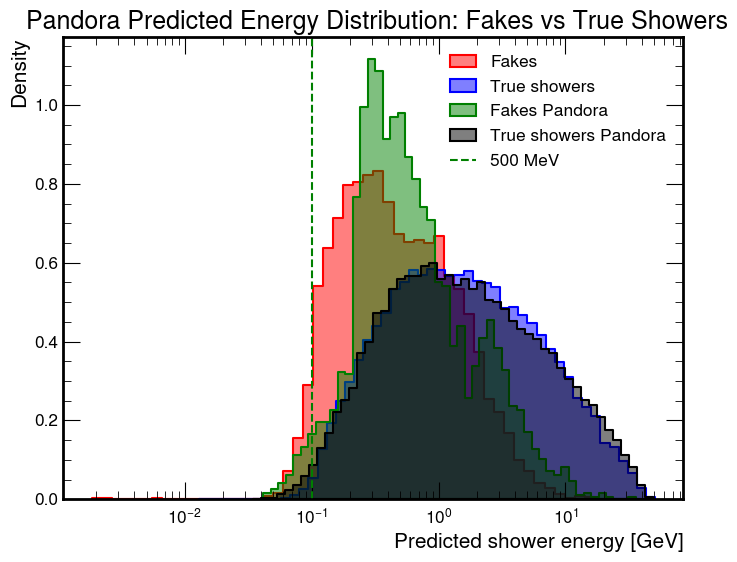

In [30]:
fakes = sd_hgb[np.isnan(sd_hgb.true_showers_E)].pred_showers_E
not_fakes = sd_hgb[~np.isnan(sd_hgb.true_showers_E)].pred_showers_E

plt.figure(figsize=(8,6))

# Plot histograms
sns.histplot(fakes, color='red', label='Fakes', log_scale=True, bins=50, stat='density', alpha=0.5, element='step', linewidth=1.5)
sns.histplot(not_fakes, color='blue', label='True showers', log_scale=True, bins=50, stat='density', alpha=0.5, element='step', linewidth=1.5)

fakes_pandora = sd_hgb2[np.isnan(sd_hgb2.true_showers_E)].pred_showers_E
not_fakes_pandora = sd_hgb2[~np.isnan(sd_hgb2.true_showers_E)].pred_showers_E
fakes_pandora = fakes_pandora[np.isfinite(fakes_pandora)]
not_fakes_pandora = not_fakes_pandora[np.isfinite(not_fakes_pandora)]

# Plot histograms
sns.histplot(fakes_pandora[fakes_pandora>0], color='green', label='Fakes Pandora', log_scale=True, bins=50, stat='density', alpha=0.5, element='step', linewidth=1.5)
sns.histplot(not_fakes_pandora[not_fakes_pandora>0], color='black', label='True showers Pandora', log_scale=True, bins=50, stat='density', alpha=0.5, element='step', linewidth=1.5)

plt.xlabel("Predicted shower energy [GeV]")
plt.ylabel("Density")
plt.title(" Pandora Predicted Energy Distribution: Fakes vs True Showers")
plt.axvline(0.1, color='green', linestyle='--', label='500 MeV')  # vertical line at 100 MeV

plt.legend()
plt.show()

In [123]:
from src.evaluation.refactor.preprocess import apply_class_correction
sd_hgb = apply_class_correction(sd_hgb)

In [125]:
sd_hgb2.keys()

Index(['true_showers_E', 'reco_showers_E', 'pred_showers_E',
       'e_pred_and_truth', 'pandora_calibrated_E', 'pandora_calibrated_pfo',
       'pandora_calibrated_pos', 'pandora_ref_pt', 'pid', 'pandora_pid',
       'step', 'number_batch', 'is_track_in_cluster', 'is_track_correct',
       'is_track_in_MC', 'distance_to_cluster_MC', 'vertex', 'ECAL_hits',
       'HCAL_hits', 'true_pos', 'pid_4_class_true'],
      dtype='object')

In [124]:
sd_hgb2[(sd_hgb2.pid==11)*(sd_hgb2.is_track_in_MC==0)].pred_pid_matched

12    NaN
20    2.0
26    2.0
20    2.0
18    2.0
     ... 
26    2.0
27    NaN
35    2.0
23    NaN
19    2.0
Name: pred_pid_matched, Length: 1886, dtype: float64

In [113]:
mask = sd_hgb[sd_hgb.pid==11].is_track_in_MC==0
mask2 = sd_hgb2[sd_hgb2.pid==11].is_track_in_MC==0
np.sum(mask),np.sum(mask2), len(sd_hgb[sd_hgb.pid==11])

(1886, 1886, 2352)

In [91]:
sd_hgb2[(sd_hgb2.pid==11)*(np.abs(sd_hgb2.reco_showers_E.values)>0.5)].number_batch



24       8.0
25       9.0
25      12.0
19      17.0
22      18.0
       ...  
17    2790.0
23    2791.0
21    2793.0
24    2793.0
29    2796.0
Name: number_batch, Length: 1159, dtype: float32

In [88]:
value = 9
new_dataset = sd_hgb[sd_hgb.number_batch.values==value]
new_dataset =  new_dataset[(np.abs(new_dataset.reco_showers_E.values)>0.5)]
new_dataset2 =  sd_hgb2[sd_hgb2.number_batch.values==value]
new_dataset2 = new_dataset2[(np.abs(new_dataset2.reco_showers_E.values)>0.5)]


In [89]:
new_dataset[new_dataset.pid==11]

,true_showers_E,reco_showers_E,pred_showers_E,e_pred_and_truth,pid,calibration_factor,calibrated_E,step,number_batch,is_track_in_cluster,...,distance_to_cluster_MC,vertex,ECAL_hits,HCAL_hits,pred_pos_matched,pred_pid_matched,pred_ref_pt_matched,matched_extra_features,true_pos,pid_4_class_true
25,3.077127,1.673838,1.673838,1.673838,11.0,1.672899,1.672899,0.0,9.0,0.0,...,0.0,"[-634.4153199309922, 265.1653719791276, -341.7...",80.0,0.0,"[-0.8394083976745605, 0.1894061416387558, -0.5...",3.0,"[-2192.494384765625, 494.7197265625, -1330.606...","[80.0, 0.9634009003639221, 1.1303728818893433,...","[-1.9653918278959066, 0.8206146222845448, -1.3...",0.0


In [117]:
new_dataset.true_showers_E = new_dataset.reco_showers_E 
new_dataset.pred_pos_matched = new_dataset.true_pos 
new_dataset.calibrated_E = new_dataset.reco_showers_E 

In [130]:
from src.evaluation.mass_calculations import particle_masses, safeint
p_true = np.array(df.true_pos.values.tolist())
p_true_norm =  p_true/ np.linalg.norm(p_true, axis=1).reshape(-1, 1)
true_e = torch.Tensor(df.true_showers_E.values)
m = np.array([particle_masses.get(abs(safeint(i)), 0) for i in df.pid])
p_squared = (true_e ** 2 - m ** 2)
p_test = np.sqrt(p_squared).reshape(-1, 1) * np.array(p_true_norm)
print(torch.norm(torch.tensor(p_test), dim=1))
torch.norm(torch.tensor(p_true), dim=1) 

tensor([ 2.6867,  0.9653,  3.9092,  2.4654, 17.3099,  9.6319,  8.7081, 25.5023,
         6.4342,  0.5460,  1.3635,  1.6593,  3.6403,  1.1016,  0.9085],
       dtype=torch.float64)


/tmp/mgarciam/ipykernel_1176833/3019486100.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(torch.norm(torch.tensor(p_test), dim=1))


tensor([ 2.7637,  1.9485,  2.8751,  3.7963, 16.1454, 11.4559,  7.4046, 24.2324,
         9.5663,  0.3428,  1.1357,  1.7530,  3.6143,  0.8552,  0.9727],
       dtype=torch.float64)

In [132]:

from torch_scatter import scatter_sum
df = new_dataset
batch_idx = df.number_batch
batch_idx = torch.tensor(batch_idx.values).long()

mask_nan_true = np.isnan(df.true_showers_E.values)

true_e = torch.Tensor(df.true_showers_E.values)
true_e[mask_nan_true] = 0
p_true = np.array(df.true_pos.values.tolist())
p_true_norm =  p_true/ np.linalg.norm(p_true, axis=1).reshape(-1, 1)
true_e = torch.Tensor(df.true_showers_E.values)
m = np.array([particle_masses.get(abs(safeint(i)), 0) for i in df.pid])
p_squared = (true_e ** 2 - m ** 2)
p_test = np.sqrt(p_squared).reshape(-1, 1) * np.array(p_true_norm)
true_E_jet = scatter_sum(true_e, batch_idx)
true_jet_vect = scatter_sum(p_test, batch_idx, dim=0)
true_jet_p = torch.norm(true_jet_vect, dim=1) 

mass_true = torch.sqrt((true_E_jet ** 2).abs() - true_jet_p ** 2)
print(true_E_jet, true_jet_p)
pred_vect = torch.tensor(
    np.array(df.pred_pos_matched.values.tolist())
)
pred_E = df.calibrated_E.values
nan_mask = np.isnan(df.calibrated_E.values)
pred_E[nan_mask] = 0
pred_vect[nan_mask] = 0

if len(pred_vect) > 0:
    pred_vect /= np.linalg.norm(pred_vect, axis=1).reshape(-1, 1)
    pred_vect[torch.isnan(pred_vect)] = 0

m = np.array([particle_masses.get(abs(safeint(i)), 0) for i in df.pid])

p_squared = (pred_E ** 2 - m ** 2)
p_squared[p_squared < 0] = 0 # they are always like of order -1e-8
pred_vect = np.sqrt(p_squared).reshape(-1, 1) * np.array(pred_vect)



pred_E = torch.tensor(pred_E)
pred_E_jet = scatter_sum(pred_E, batch_idx)
pred_jet_vect = scatter_sum(torch.tensor(pred_vect), batch_idx, dim=0)
pred_jet_p = torch.norm(pred_jet_vect, dim=1)
mass_pred_p_1 = torch.sqrt(torch.abs(pred_E_jet ** 2) - pred_jet_p ** 2)
print(pred_E_jet, pred_jet_p)


tensor([87.0571]) tensor([3.1168], dtype=torch.float64)
tensor([87.0571]) tensor([3.1168], dtype=torch.float64)


In [114]:
from src.evaluation.mass_calculations import get_mass
mass_pred_p_1,mass_pred_p_pandora,  mass_true = get_mass(new_dataset, new_dataset2)

print("here1", mass_pred_p_1[value], mass_pred_p_pandora[value], mass_true[value])
print("here", mass_pred_p_1[value]/mass_true[value],
       mass_pred_p_pandora[value]/mass_true[value])
print("_____________________________________")

# mass_pred_p_1,mass_pred_p_pandora,  mass_true = get_mass(new_dataset[(np.abs(new_dataset.pid.values)==211)], new_dataset2[(np.abs(new_dataset2.pid.values)==211)])
# print(mass_pred_p_1[value], mass_pred_p_pandora[value], mass_true[value])
# if len(new_dataset[(np.abs(new_dataset.pid.values)==2112)])>0:
#     mass_pred_p_1,mass_pred_p_pandora,  mass_true = get_mass(new_dataset[(np.abs(new_dataset.pid.values)==2112)], new_dataset2[(np.abs(new_dataset2.pid.values)==2112)])
#     print(mass_pred_p_1[value], mass_pred_p_pandora[value], mass_true[value])
# if len(new_dataset[(np.abs(new_dataset.pid.values)==2212)])>0:
#     mass_pred_p_1,mass_pred_p_pandora,  mass_true = get_mass(new_dataset[(np.abs(new_dataset.pid.values)==2212)], new_dataset2[(np.abs(new_dataset2.pid.values)==2212)])
#     print(mass_pred_p_1[value], mass_pred_p_pandora[value], mass_true[value])

tensor([87.0571]) tensor([1.3686], dtype=torch.float64)
tensor([87.0571]) tensor([3.1168], dtype=torch.float64)
tensor([90.1718]) tensor([3.2079], dtype=torch.float64)
here1 tensor(87.0012, dtype=torch.float64) tensor(90.1147, dtype=torch.float64) tensor(87.0463, dtype=torch.float64)
here tensor(0.9995, dtype=torch.float64) tensor(1.0353, dtype=torch.float64)
_____________________________________


In [111]:
new_dataset

,true_showers_E,reco_showers_E,pred_showers_E,e_pred_and_truth,pid,calibration_factor,calibrated_E,step,number_batch,is_track_in_cluster,...,distance_to_cluster_MC,vertex,ECAL_hits,HCAL_hits,pred_pos_matched,pred_pid_matched,pred_ref_pt_matched,matched_extra_features,true_pos,pid_4_class_true
0,2.690323,2.690323,2.690323,2.690324,-211.0,2.765508,2.765508,0.0,0.0,1.0,...,0.107088,"[-0.27163881063846795, -0.7838215221038044, -1...",67.0,5.0,"[2.4107354924318702, -0.9227785994034223, 0.98...",1.0,"[0.04879868030548096, 0.030511844903230667, 0....","[73.0, 0.923040509223938, -4.778499603271484, ...","[2.4107354924318702, -0.9227785994034223, 0.98...",1.0
1,0.975292,0.975292,0.975292,0.975292,211.0,1.944238,1.944238,0.0,0.0,1.0,...,0.117514,"[-0.27163881063846795, -0.7838215221038044, -1...",67.0,0.0,"[1.8107985256284678, -0.7184793959793107, -0.0...",0.0,"[0.014664828777313232, -0.0373481810092926, 0....","[68.0, 0.968431293964386, 1.2146916389465332, ...","[1.8107985256284678, -0.7184793959793107, -0.0...",1.0
2,3.911691,3.911691,3.911691,3.887537,-211.0,2.871168,2.871168,0.0,0.0,1.0,...,0.102540,"[-0.27163881063846795, -0.7838215221038044, -1...",41.0,33.0,"[-2.538321982762186, 1.1951264756330764, -0.62...",1.0,"[-0.20008230209350586, -0.03656411170959473, -...","[75.0, 0.9647111296653748, -5.567854404449463,...","[-2.538321982762186, 1.1951264756330764, -0.62...",1.0
3,2.637915,2.637915,2.637915,2.637915,2212.0,3.799604,3.799604,0.0,0.0,1.0,...,0.084252,"[-0.27163881063846795, -0.7838215221038044, -1...",82.0,2.0,"[-3.4677880785259734, 1.3395846670344034, -0.7...",1.0,"[-0.023506581783294678, 0.021877199411392212, ...","[85.0, 0.8523300886154175, -1.899641513824463,...","[-3.4677880785259734, 1.3395846670344034, -0.7...",1.0
4,17.335346,17.335346,17.335346,15.623225,-2212.0,17.701832,17.701832,0.0,0.0,0.0,...,0.000000,"[-0.27163881063846795, -0.7838215221038044, -1...",592.0,15.0,"[-14.164046698523325, 7.065217696618396, -3.18...",2.0,"[-2064.65283203125, 903.0487060546875, -473.07...","[607.0, 0.6501588821411133, -3.140098571777343...","[-14.164046698523325, 7.065217696618396, -3.18...",1.0
5,9.632891,9.632891,9.632891,9.046322,211.0,10.185658,10.185658,0.0,0.0,1.0,...,0.101448,"[-0.27163881063846795, -0.7838215221038044, -1...",41.0,106.0,"[-10.072198505398351, 4.854920414613438, -2.49...",1.0,"[-0.15678369998931885, 0.10009792447090149, -0...","[148.0, 0.8689639568328857, -5.013867378234863...","[-10.072198505398351, 4.854920414613438, -2.49...",1.0
6,8.709264,8.709264,8.709264,5.037882,-211.0,7.390769,7.390769,0.0,0.0,1.0,...,0.148220,"[-0.27163881063846795, -0.7838215221038044, -1...",84.0,46.0,"[-6.409602843256163, 3.405610754444905, -1.465...",1.0,"[-0.1343449354171753, 0.04152664542198181, -0....","[131.0, 0.5769158601760864, -4.945405006408691...","[-6.409602843256163, 3.405610754444905, -1.465...",1.0
7,25.502342,25.502342,25.502342,25.249842,22.0,25.427216,25.427216,0.0,0.0,0.0,...,0.000000,"[-0.26929181840710026, -0.7849706382463671, -1...",674.0,4.0,"[21.276221096399812, -10.38707723144543, 5.161...",3.0,"[2011.486328125, -983.5989990234375, 467.90756...","[678.0, 0.8078723549842834, 1.0301496982574463...","[21.276221096399812, -10.38707723144543, 5.161...",3.0
8,6.435733,6.435733,6.435733,5.348267,211.0,9.555194,9.555194,0.0,0.0,1.0,...,0.086532,"[-0.27163881063846795, -0.7838215221038044, -1...",252.0,21.0,"[8.856945633684118, -3.321793002136642, 1.4262...",1.0,"[0.03474849462509155, -0.021733194589614868, 0...","[274.0, 0.7929267287254333, -3.405770540237426...","[8.856945633684118, -3.321793002136642, 1.4262...",1.0
11,0.545962,0.545962,0.545962,0.545962,22.0,0.469189,0.469189,0.0,0.0,0.0,...,0.000000,"[-0.27163881844742477, -0.7838215298502341, -1...",25.0,0.0,"[-0.32816930055168797, -0.03557239675715785, -...",3.0,"[-2180.01220703125, -224.80921936035156, -632....","[25.0, 0.9802363514900208, -0.5040324926376343...","[-0.32816930055168797, -0.03557239675715785, -...",3.0


In [13]:
sd = sd_hgb
sd_pandora = sd_hgb2
corrected_list = []
reco_list = []
reco_list_pandora = []
corrected_list_pandora = []
for i in range(0, int(np.max(sd.number_batch))):
    mask = sd.number_batch == i
    event_E_total_reco = np.nansum(sd.reco_showers_E[mask])
    event_E_total_true = np.nansum(sd.true_showers_E[mask])
    event_E_total_reco_corrected = np.nansum(sd.calibrated_E[mask])
    event_ML_total_reco = np.nansum(sd.pred_showers_E[mask])
    mask_p = sd_pandora.number_batch == i
    event_E_total_reco_p = np.nansum(sd_pandora.reco_showers_E[mask_p])
    event_E_total_true_p = np.nansum(sd_pandora.true_showers_E[mask_p])
    event_ML_total_reco_p = np.nansum(sd_pandora.pred_showers_E[mask_p])
    event_ML_total_reco_p_corrected = np.nansum(
        sd_pandora.pandora_calibrated_pfo[mask_p]
    )

    reco_list.append(event_ML_total_reco / event_E_total_reco)
    corrected_list.append(event_E_total_reco_corrected / event_E_total_true)
    reco_list_pandora.append(event_ML_total_reco_p / event_E_total_reco_p)
    corrected_list_pandora.append(
        event_ML_total_reco_p_corrected / event_E_total_true_p
    )

<Axes: ylabel='Percent'>

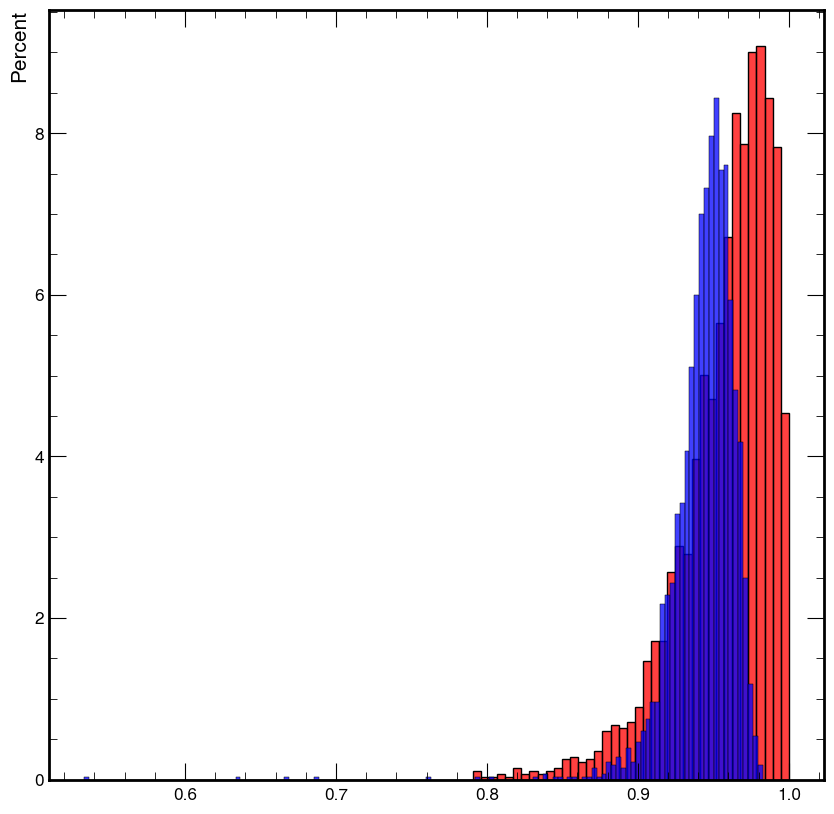

In [21]:
import seaborn 
seaborn.histplot(reco_list, color="red", stat="percent")
seaborn.histplot(reco_list_pandora, color="blue", stat="percent")

In [34]:
sd_hgb[sd_hgb.is_track_in_cluster==1]

,true_showers_E,reco_showers_E,pred_showers_E,e_pred_and_truth,pid,calibration_factor,calibrated_E,step,number_batch,is_track_in_cluster,...,distance_to_cluster_MC,vertex,ECAL_hits,HCAL_hits,pred_pos_matched,pred_pid_matched,pred_ref_pt_matched,matched_extra_features,true_pos,pid_4_class_true
0,3.552161,2.690324,2.690324,2.690323,-211.0,2313.041504,2313.041504,0.0,0.0,1.0,...,0.107088,"[-0.27163881063846795, -0.7838215221038044, -1...",67.0,5.0,"[0.929512083530426, -0.10410282015800476, 0.35...",1.0,"[0.04879862070083618, 0.030511844903230667, 0....","[73.0, 0.9380859732627869, -4.778499126434326,...","[2.4107354924318702, -0.9227785994034223, 0.98...",1.0
1,2.564927,0.975292,1.010122,0.975292,211.0,2194.447998,2194.447998,0.0,0.0,1.0,...,0.117514,"[-0.27163881063846795, -0.7838215221038044, -1...",68.0,0.0,"[0.749334990978241, -0.6616042256355286, -0.02...",0.0,"[0.016515493392944336, -0.03340119123458862, 0...","[69.0, 0.9681406021118164, 1.3456647396087646,...","[1.8107985256284678, -0.7184793959793107, -0.0...",1.0
2,3.647007,3.911691,3.911691,3.911691,-211.0,2254.888184,2254.888184,0.0,0.0,1.0,...,0.102540,"[-0.27163881063846795, -0.7838215221038044, -1...",41.0,34.0,"[-0.953484058380127, 0.19639132916927338, -0.2...",1.0,"[-0.19984984397888184, -0.03654947131872177, -...","[76.0, 0.9610679149627686, -5.579139709472656,...","[-2.538321982762186, 1.1951264756330764, -0.62...",1.0
3,5.052095,2.637915,2.691459,2.637915,2212.0,2200.508301,2200.508301,0.0,0.0,1.0,...,0.084252,"[-0.27163881063846795, -0.7838215221038044, -1...",82.0,2.0,"[-0.8369341492652893, 0.5044815540313721, -0.2...",1.0,"[-0.023506581783294678, 0.021877199411392212, ...","[85.0, 0.8454890847206116, -1.8996416330337524...","[-3.4677880785259734, 1.3395846670344034, -0.7...",1.0
5,14.461568,9.632891,9.711829,9.301900,211.0,2207.373047,2207.373047,0.0,0.0,1.0,...,0.101448,"[-0.27163881063846795, -0.7838215221038044, -1...",41.0,116.0,"[-0.8487842679023743, 0.47787943482398987, -0....",1.0,"[-0.16206657886505127, 0.09973302483558655, -0...","[158.0, 0.8564897775650024, -5.476565837860107...","[-10.072198505398351, 4.854920414613438, -2.49...",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,4.685674,6.199331,6.067290,5.990211,-211.0,2577.512695,2577.512695,139.0,2799.0,1.0,...,0.123233,"[-0.5264625232258252, 0.1938197793268371, 27.4...",44.0,70.0,"[-0.27269721031188965, 0.8057371973991394, 0.5...",1.0,"[-0.057477161288261414, 0.12997978925704956, 0...","[115.0, 0.894622802734375, -5.062125205993652,...","[-1.5506730904593797, 6.66811913419186, 4.1384...",1.0
4,8.904968,16.392973,16.653891,16.392973,-211.0,2425.302002,2425.302002,139.0,2799.0,1.0,...,0.120096,"[-0.5264625232258252, 0.1938197793268371, 27.4...",44.0,175.0,"[0.2861430048942566, -0.8584229350090027, -0.4...",1.0,"[0.07655787467956543, -0.1569867730140686, -0....","[220.0, 0.8485553860664368, -8.382918357849121...","[3.931417073530692, -13.881196405184962, -6.95...",1.0
6,14.013131,23.703997,23.631170,23.235939,211.0,2443.907471,2443.907471,139.0,2799.0,1.0,...,0.161003,"[-0.5264625232258252, 0.1938197793268371, 27.4...",80.0,263.0,"[-0.19987612962722778, 0.8797386884689331, 0.4...",1.0,"[-0.0304124653339386, 0.14870095252990723, 0.0...","[344.0, 0.7600474953651428, -15.49001789093017...","[-5.95673157873907, 23.291147587935065, 11.197...",1.0
7,3.154362,6.413040,5.941169,5.940931,-211.0,2356.962402,2356.962402,139.0,2799.0,1.0,...,0.109299,"[-0.5264625232258252, 0.1938197793268371, 27.4...",40.0,56.0,"[-0.331766277551651, 0.8617621660232544, 0.383...",1.0,"[-0.08513136208057404, 0.11748367547988892, 0....","[98.0, 0.863226056098938, -4.9367265701293945,...","[-1.4810896126574864, 5.666992739435987, 2.354...",1.0


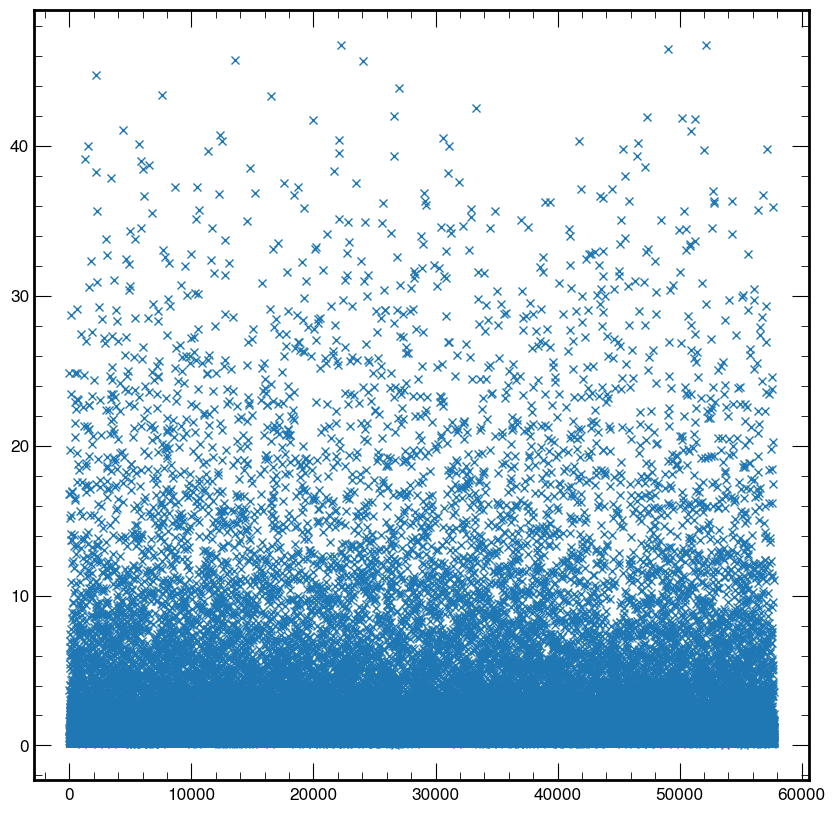

In [32]:
plt.plot(sd_hgb[sd_hgb.is_track_in_cluster==0].calibration_factor.values, 'x')

In [14]:
for value in range(0,100):
    E_val = np.nansum(sd_hgb[sd_hgb.number_batch.values==value]["calibrated_E"].values)/np.nansum(sd_hgb[sd_hgb.number_batch.values==value]["true_showers_E"].values)
    E_val_pandora = np.nansum(sd_hgb2[sd_hgb2.number_batch.values==value]["pandora_calibrated_E"].values)/np.nansum(sd_hgb2[sd_hgb2.number_batch.values==value]["true_showers_E"].values)
    if (E_val<0.9) and (E_val<E_val_pandora):
        print(value, E_val, E_val_pandora)

50 0.8610778 0.95779186
52 0.68693846 0.75565857
65 0.4137948 0.42160264
82 0.73148316 0.7334349


(0.0, 2.0)

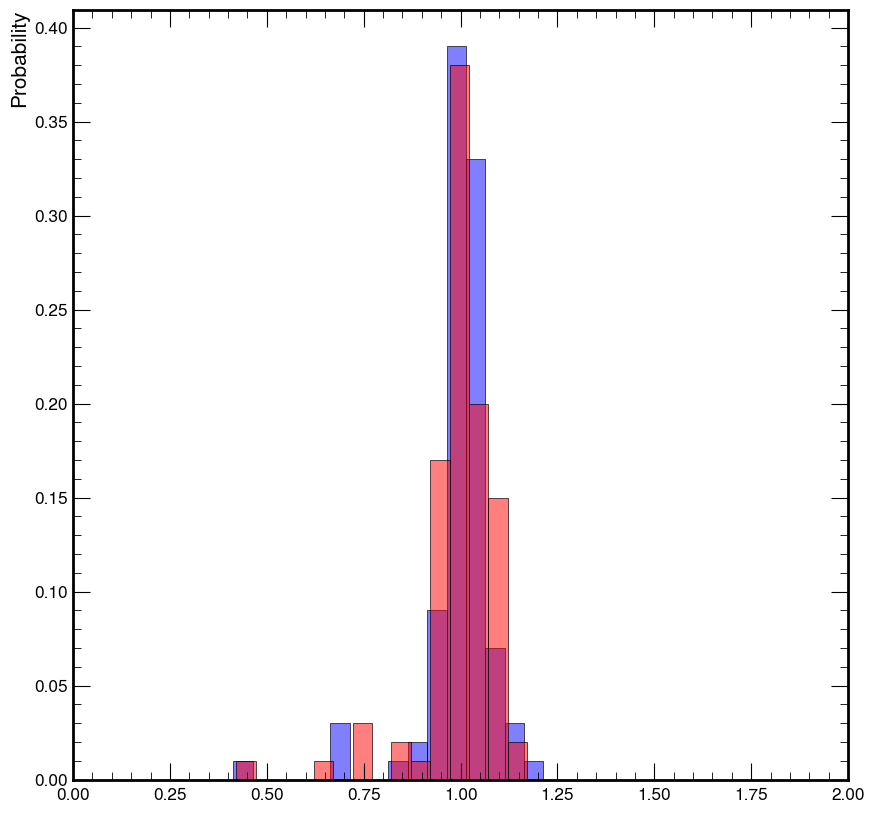

In [19]:
all_ml = []
all_pandora = []
for value in range(0,100):
    E_val = np.nansum(sd_hgb[sd_hgb.number_batch.values==value]["calibrated_E"].values)/np.nansum(sd_hgb[sd_hgb.number_batch.values==value]["true_showers_E"].values)
    E_val_pandora = np.nansum(sd_hgb2[sd_hgb2.number_batch.values==value]["pandora_calibrated_E"].values)/np.nansum(sd_hgb2[sd_hgb2.number_batch.values==value]["true_showers_E"].values)
    all_ml.append(E_val)
    all_pandora.append(E_val_pandora)
import seaborn 
seaborn.histplot(all_ml, binwidth=0.05, label="MLPF", color="blue", stat="probability", alpha=0.5)
seaborn.histplot(all_pandora, binwidth=0.05, label="pandora", color="red", stat="probability", alpha=0.5)
plt.xlim([0,2])

In [10]:
for value in range(0,100):
    E_val = np.nansum(sd_hgb[sd_hgb.number_batch.values==value]["calibrated_E"].values)/np.nansum(sd_hgb[sd_hgb.number_batch.values==value]["true_showers_E"].values)
    E_val_pandora = np.nansum(sd_hgb2[sd_hgb2.number_batch.values==value]["pandora_calibrated_E"].values)/np.nansum(sd_hgb2[sd_hgb2.number_batch.values==value]["true_showers_E"].values)
    if (E_val<0.9) and (E_val<E_val_pandora):
        print(value, E_val, E_val_pandora)

1 0.85515463 0.95899975
52 0.67919075 0.75565857
82 0.73266494 0.7334349
122 0.771146 1.0106587
135 0.7038192 0.7318052
156 0.6095989 0.9924514
170 0.82402605 1.0352038
180 0.85843927 0.9714946
198 0.8671669 0.97125083
207 0.7332139 1.0910496
239 0.78558457 0.9999227
241 0.83854413 0.9738023
249 0.7822973 1.0101699
252 0.56528616 0.584274
318 0.8034851 0.9923199
322 0.54214054 0.6054654
345 0.73526335 0.98038405
381 0.8411651 1.0560737
403 0.68169343 1.0012195
427 0.72571665 1.0264481
430 0.73206246 1.0170012
493 0.85564226 0.9000477
503 0.837533 0.9682204
538 0.8901536 1.0520068
541 0.79404074 1.0447556
551 0.75206345 1.0574207
565 0.57689494 1.1289272
598 0.79693854 0.8015916
599 0.85551333 0.8620235
645 0.78723294 1.0774541
669 0.5987999 0.62055844
711 0.61813956 0.6607611
742 0.7895912 1.0450511
751 0.7700553 0.97972584
759 0.89926505 0.9515578
788 0.7918379 0.97883147
798 0.56931394 0.5821317
807 0.8673448 1.009139
847 0.6000468 1.0764811
896 0.7168786 0.8494515
940 0.8597303 0.94

In [55]:
value = 0
new_dataset = sd_hgb[sd_hgb.number_batch.values==value]
new_dataset

,true_showers_E,reco_showers_E,pred_showers_E,e_pred_and_truth,pid,calibration_factor,calibrated_E,step,number_batch,is_track_in_cluster,...,distance_to_cluster_MC,vertex,ECAL_hits,HCAL_hits,pred_pos_matched,pred_pid_matched,pred_ref_pt_matched,matched_extra_features,true_pos,pid_4_class_true
0,3.552161,2.690323,2.690323,2.690324,-211.0,2.765508,2.765508,0.0,0.0,1.0,...,0.107088,"[-0.27163881063846795, -0.7838215221038044, -1...",67.0,5.0,"[0.8722467422485352, -0.33339619636535645, 0.3...",1.0,"[0.04879868030548096, 0.030511844903230667, 0....","[73.0, 0.923040509223938, -4.778499603271484, ...","[2.4107354924318702, -0.9227785994034223, 0.98...",1.0
1,2.564927,0.975292,0.975292,0.975292,211.0,1.944238,1.944238,0.0,0.0,1.0,...,0.117514,"[-0.27163881063846795, -0.7838215221038044, -1...",67.0,0.0,"[0.9293229579925537, -0.3688018321990967, -0.0...",0.0,"[0.014664828777313232, -0.0373481810092926, 0....","[68.0, 0.968431293964386, 1.2146916389465332, ...","[1.8107985256284678, -0.7184793959793107, -0.0...",1.0
2,3.647007,3.911691,3.887538,3.887537,-211.0,2.871168,2.871168,0.0,0.0,1.0,...,0.102540,"[-0.27163881063846795, -0.7838215221038044, -1...",41.0,33.0,"[-0.8826618194580078, 0.41617026925086975, -0....",1.0,"[-0.20008230209350586, -0.03656411170959473, -...","[75.0, 0.9647111296653748, -5.567854404449463,...","[-2.538321982762186, 1.1951264756330764, -0.62...",1.0
3,5.052095,2.637915,2.691459,2.637915,2212.0,3.799604,3.799604,0.0,0.0,1.0,...,0.084252,"[-0.27163881063846795, -0.7838215221038044, -1...",82.0,2.0,"[-0.9134529232978821, 0.3529059588909149, -0.2...",1.0,"[-0.023506581783294678, 0.021877199411392212, ...","[85.0, 0.8523300886154175, -1.899641513824463,...","[-3.4677880785259734, 1.3395846670344034, -0.7...",1.0
4,20.304108,17.335346,15.638065,15.623225,-2212.0,17.701832,17.701832,0.0,0.0,0.0,...,0.000000,"[-0.27163881063846795, -0.7838215221038044, -1...",592.0,15.0,"[-0.8966510891914368, 0.39218196272850037, -0....",2.0,"[-2064.65283203125, 903.0487060546875, -473.07...","[607.0, 0.6501588821411133, -3.140098571777343...","[-14.164046698523325, 7.065217696618396, -3.18...",1.0
5,14.461568,9.632891,9.046322,9.046322,211.0,10.185658,10.185658,0.0,0.0,1.0,...,0.101448,"[-0.27163881063846795, -0.7838215221038044, -1...",41.0,106.0,"[-0.8795643448829651, 0.42309942841529846, -0....",1.0,"[-0.15678369998931885, 0.10009792447090149, -0...","[148.0, 0.8689639568328857, -5.013867378234863...","[-10.072198505398351, 4.854920414613438, -2.49...",1.0
6,9.183300,8.709264,5.128401,5.037882,-211.0,7.390769,7.390769,0.0,0.0,1.0,...,0.148220,"[-0.27163881063846795, -0.7838215221038044, -1...",84.0,46.0,"[-0.8656471371650696, 0.4598177671432495, -0.1...",1.0,"[-0.1343449354171753, 0.04152664542198181, -0....","[131.0, 0.5769158601760864, -4.945405006408691...","[-6.409602843256163, 3.405610754444905, -1.465...",1.0
7,30.528578,25.502342,25.376099,25.249842,22.0,25.427216,25.427216,0.0,0.0,0.0,...,0.000000,"[-0.26929181840710026, -0.7849706382463671, -1...",674.0,4.0,"[0.8793529868125916, -0.4299958348274231, 0.20...",3.0,"[2011.486328125, -983.5989990234375, 467.90756...","[678.0, 0.8078723549842834, 1.0301496982574463...","[21.276221096399812, -10.38707723144543, 5.161...",3.0
8,12.607326,6.435733,5.527651,5.348267,211.0,9.555194,9.555194,0.0,0.0,1.0,...,0.086532,"[-0.27163881063846795, -0.7838215221038044, -1...",252.0,21.0,"[0.9258458614349365, -0.34716102480888367, 0.1...",1.0,"[0.03474849462509155, -0.021733194589614868, 0...","[274.0, 0.7929267287254333, -3.405770540237426...","[8.856945633684118, -3.321793002136642, 1.4262...",1.0
9,0.086023,0.072657,NaN,NaN,22.0,NaN,NaN,0.0,0.0,0.0,...,0.000000,"[-0.2716379569102161, -0.7838366925392232, -19...",NaN,NaN,"[nan, nan, nan]",NaN,"[nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[0.06082642175694399, -0.0388866734829514, -0....",3.0


In [58]:
sd_hgb.keys()

Index(['true_showers_E', 'reco_showers_E', 'pred_showers_E',
       'e_pred_and_truth', 'pid', 'calibration_factor', 'calibrated_E', 'step',
       'number_batch', 'is_track_in_cluster', 'is_track_correct',
       'is_track_in_MC', 'distance_to_cluster_MC', 'vertex', 'ECAL_hits',
       'HCAL_hits', 'pred_pos_matched', 'pred_pid_matched',
       'pred_ref_pt_matched', 'matched_extra_features', 'true_pos',
       'pid_4_class_true'],
      dtype='object')

In [60]:
sd_hgb2.pandora_ref_pt

0     [32.9984130859375, -13.365065574645996, -6.091...
1     [32.59972381591797, -14.055658340454102, -20.3...
2     [-32.485836029052734, 14.252888679504395, -27....
3     [-33.659934997558594, 12.21922492980957, -27.1...
4     [-2214.8369140625, 1115.4188232421875, -536.66...
                            ...                        
16    [360.9274597167969, -1203.5479736328125, -2334...
17                                      [nan, nan, nan]
18    [-387.2529602050781, 2166.480224609375, 409.88...
19    [740.108154296875, -1633.5994873046875, -2340....
20    [687.9321899414062, -2122.077880859375, -1073....
Name: pandora_ref_pt, Length: 74013, dtype: object

In [160]:
new_dataset2 =  sd_hgb2[sd_hgb2.number_batch.values==value]
# difs2= (new_dataset2.pred_showers_E.values-new_dataset2.pandora_calibrated_E.values)>2
new_dataset2 = new_dataset2[(np.abs(new_dataset2.pid.values)==22)*(np.abs(new_dataset2.reco_showers_E.values)>0.5)+np.isnan(new_dataset2.reco_showers_E.values)]
# print(new_dataset2.pred_showers_E/new_dataset2.reco_showers_E)
new_dataset2

,true_showers_E,reco_showers_E,pred_showers_E,e_pred_and_truth,pandora_calibrated_E,pandora_calibrated_pfo,pandora_calibrated_pos,pandora_ref_pt,pid,pandora_pid,...,number_batch,is_track_in_cluster,is_track_correct,is_track_in_MC,distance_to_cluster_MC,vertex,ECAL_hits,HCAL_hits,true_pos,pid_4_class_true
3,2.802018,2.807836,2.785698,2.733941,2.835202,2.835202,"[-0.46791571378707886, -0.1480845808982849, 2....","[-397.3477478027344, -126.90716552734375, 2367...",22.0,22.0,...,12.0,0.0,0.0,0,0.0,"[-0.5902702582769497, 0.4207620340968956, 37.6...",113.0,2.0,"[-0.46269572365916034, -0.14875567255147987, 2...",3.0
14,1.539780,1.850385,1.797487,1.790509,1.829428,1.829428,"[0.29669588804244995, -0.21525834500789642, -1...","[390.5001220703125, -285.67645263671875, -2367...",22.0,22.0,...,12.0,0.0,0.0,0,0.0,"[-0.5902597501247517, 0.4207614612778894, 37.6...",67.0,1.0,"[0.24382617479760282, -0.17698119575042032, -1...",3.0
19,3.079825,2.995848,3.393913,2.894284,5.359318,5.359318,"[0.4201269745826721, -0.5956911444664001, -5.3...","[184.4976043701172, -331.51593017578125, -3036...",22.0,2112.0,...,12.0,0.0,0.0,0,0.0,"[-0.5902468647404269, 0.42073309125561675, 37....",0.0,37.0,"[0.18364447773253137, -0.3097566682704958, -3....",3.0
27,NaN,NaN,0.170858,NaN,0.173894,0.173894,"[-0.08785562962293625, 0.015162513591349125, -...","[-1361.463623046875, 231.041748046875, -2340.0...",NaN,22.0,...,12.0,0.0,0.0,0,0.0,"[nan, nan, nan]",12.0,0.0,"[nan, nan, nan]",NaN
28,NaN,NaN,0.203680,NaN,0.207299,0.207299,"[0.07878314703702927, -0.15857329964637756, 0....","[976.0797119140625, -1949.160400390625, 1320.4...",NaN,22.0,...,12.0,0.0,0.0,0,0.0,"[nan, nan, nan]",10.0,0.0,"[nan, nan, nan]",NaN
29,NaN,NaN,0.261801,NaN,0.291883,0.291883,"[-0.10258817672729492, -0.14773662388324738, -...","[-1070.2528076171875, -1586.3299560546875, -24...",NaN,2112.0,...,12.0,0.0,0.0,0,0.0,"[nan, nan, nan]",9.0,0.0,"[nan, nan, nan]",NaN
30,NaN,NaN,0.769407,NaN,1.706350,1.706350,"[0.037879012525081635, -0.1851053088903427, 1....","[9.819524765014648, -385.2504577636719, 3232.3...",NaN,2112.0,...,12.0,0.0,0.0,0,0.0,"[nan, nan, nan]",0.0,15.0,"[nan, nan, nan]",NaN


In [17]:
nan_pandora= sd_hgb3[(sd_hgb3["true_showers_E"]>10)*(np.isnan(sd_hgb3["pred_showers_E"]))]
pid_values = np.abs(nan_pandora.pid.values)
is_track_in_MC = nan_pandora.is_track_in_MC.values
for i in np.unique(pid_values):
    print(i, np.sum(pid_values==i), np.sum((pid_values==i)*(is_track_in_MC)))

# 11.0 31 16
# 13.0 17 17
# 22.0 49 0
# 130.0 30 0
# 211.0 33 26
# 321.0 22 20
# 2112.0 68 0
# 2212.0 23 23

11.0 22 10
13.0 10 10
22.0 35 0
130.0 14 0
211.0 13 10
321.0 10 8
2112.0 34 0
2212.0 10 10


In [6]:
sd_hgb3.keys()

Index(['true_showers_E', 'reco_showers_E', 'pred_showers_E',
       'e_pred_and_truth', 'pid', 'calibration_factor', 'calibrated_E', 'step',
       'number_batch', 'is_track_in_cluster', 'is_track_correct',
       'is_track_in_MC', 'distance_to_cluster_MC', 'vertex', 'ECAL_hits',
       'HCAL_hits', 'ECAL_hits_true', 'HCAL_hits_true', 'delta_MC',
       'pred_pos_matched', 'pred_pid_matched', 'pred_ref_pt_matched',
       'matched_extra_features', 'true_pos', 'pid_4_class_true'],
      dtype='object')

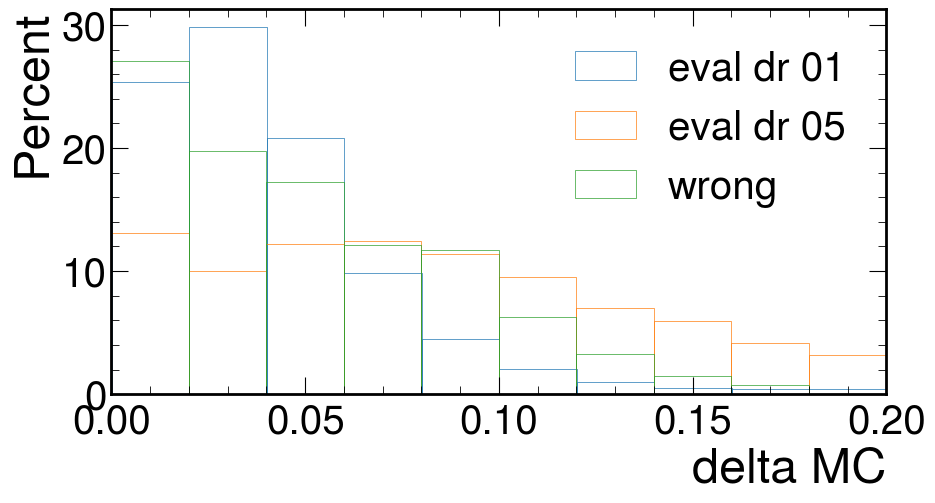

In [13]:
import seaborn as sns
plt.figure(figsize=(10,5))
nan_delta = sd_hgb3[(sd_hgb3["true_showers_E"]>10)*(np.isnan(sd_hgb3["pred_showers_E"]))]
# bins = np.logspace(np.log10(min(sd_hgb["delta_MC"].values+1e-4)), np.log10(max(sd_hgb["delta_MC"].values)), 30)
# bins = np.arange(min(sd_hgb["delta_MC"].values+1e-4), max(sd_hgb["delta_MC"].values), 30)
sns.histplot(sd_hgb["delta_MC"].values, binwidth=0.02, stat="percent",label="eval dr 01", fill=False)
sns.histplot(sd_hgb2["delta_MC"].values, binwidth=0.02,  stat="percent",label="eval dr 05", fill=False)
sns.histplot(nan_delta["delta_MC"].values, binwidth=0.02,  stat="percent",label="wrong", fill=False)
# plt.xscale('log') 
plt.xlabel("delta MC")
plt.xlim([0,0.2])
plt.legend()

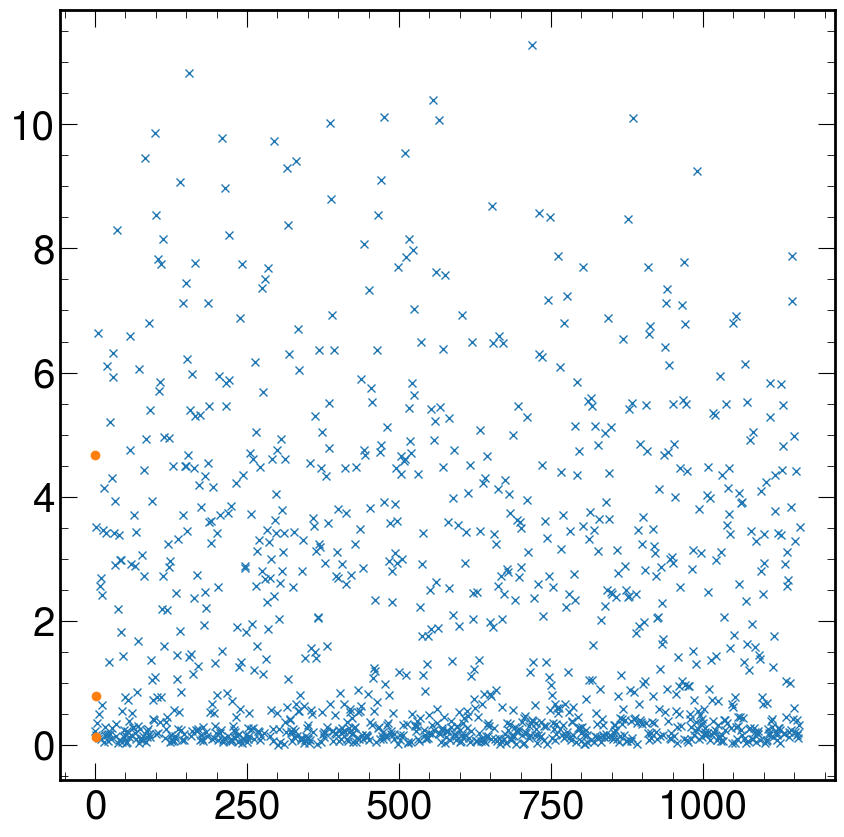

In [8]:
plt.plot(sd_hgb[(sd_hgb["true_showers_E"]>10)*(np.abs(sd_hgb["pid"])==211)]["HCAL_hits_true"].values/ sd_hgb[(sd_hgb["true_showers_E"]>10)*(np.abs(sd_hgb["pid"])==211)]["ECAL_hits_true"].values,'x')
plt.plot(sd_hgb[(sd_hgb["true_showers_E"]>10)*(np.abs(sd_hgb["pid"])==211)*(np.isnan(sd_hgb["pred_showers_E"]))]["HCAL_hits_true"].values/ sd_hgb[(sd_hgb["true_showers_E"]>10)*(np.abs(sd_hgb["pid"])==211)*(np.isnan(sd_hgb["pred_showers_E"]))]["ECAL_hits_true"].values,'o')

In [9]:
sd_pandora[(sd_pandora["true_showers_E"]>10)*(np.abs(sd_pandora["pid"])==211)*(np.isnan(sd_pandora["pred_showers_E"]))]

,true_showers_E,reco_showers_E,pred_showers_E,e_pred_and_truth,pandora_calibrated_E,pandora_calibrated_pfo,pandora_calibrated_pos,pandora_ref_pt,pid,pandora_pid,...,is_track_in_MC,distance_to_cluster_MC,vertex,ECAL_hits,HCAL_hits,ECAL_hits_true,HCAL_hits_true,delta_MC,true_pos,pid_4_class_true
13,10.112937,10.159225,NaN,NaN,NaN,NaN,"[nan, nan, nan]","[nan, nan, nan]",-211.0,NaN,...,0,0.0,"[378.61456298828125, -854.87109375, 367.119537...",NaN,NaN,49.0,101.0,0.050042,"[4.588817119598389, -8.189399719238281, 3.7587...",1.0
11,13.288325,14.664300,NaN,NaN,NaN,NaN,"[nan, nan, nan]","[nan, nan, nan]",211.0,NaN,...,0,0.0,"[-1555.5078125, -220.91529846191406, 177.68647...",NaN,NaN,154.0,95.0,0.017871,"[-13.140216827392578, -1.5050020217895508, 1.2...",1.0
13,11.665924,12.641893,NaN,NaN,NaN,NaN,"[nan, nan, nan]","[nan, nan, nan]",-211.0,NaN,...,0,0.0,"[-1131.646484375, 406.73077392578125, -580.024...",NaN,NaN,134.0,106.0,0.007752,"[-9.899717330932617, 3.5082321166992188, -5.07...",1.0
10,17.454470,23.282207,NaN,NaN,NaN,NaN,"[nan, nan, nan]","[nan, nan, nan]",-211.0,NaN,...,0,0.0,"[-137.60556030273438, 711.0167846679688, 175.1...",NaN,NaN,256.0,154.0,0.019425,"[-3.2356090545654297, 16.607688903808594, 4.28...",1.0
14,12.401534,13.875722,NaN,NaN,NaN,NaN,"[nan, nan, nan]","[nan, nan, nan]",211.0,NaN,...,0,0.0,"[-512.3909301757812, -436.176513671875, -373.8...",NaN,NaN,43.0,130.0,0.012665,"[-8.412741661071777, -6.678917407989502, -6.19...",1.0


In [10]:
sd_hgb[(sd_hgb["true_showers_E"]>10)*(np.abs(sd_hgb["pid"])==211)*(np.isnan(sd_hgb["pred_showers_E"]))]

,true_showers_E,reco_showers_E,pred_showers_E,e_pred_and_truth,pid,calibration_factor,calibrated_E,step,number_batch,is_track_in_cluster,...,HCAL_hits,ECAL_hits_true,HCAL_hits_true,delta_MC,pred_pos_matched,pred_pid_matched,pred_ref_pt_matched,matched_extra_features,true_pos,pid_4_class_true
12,17.467365,21.948503,NaN,NaN,-211.0,NaN,NaN,49.0,495.0,0.0,...,NaN,40.0,187.0,0.008983,"[nan, nan, nan]",NaN,"[nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[14.778584480285645, -8.370357513427734, -4.07...",1.0
2,16.561714,15.549034,NaN,NaN,-211.0,NaN,NaN,76.0,765.0,0.0,...,NaN,549.0,67.0,0.223142,"[nan, nan, nan]",NaN,"[nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[13.358470916748047, 5.226413249969482, -8.276...",1.0
13,11.665924,12.641892,NaN,NaN,-211.0,NaN,NaN,224.0,2241.0,0.0,...,NaN,134.0,106.0,0.007752,"[nan, nan, nan]",NaN,"[nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[-9.899717330932617, 3.5082321166992188, -5.07...",1.0


In [11]:
400*10

4000